In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [10]:
Univ = pd.read_csv("dataset/Universities.csv")

In [11]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

In [12]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

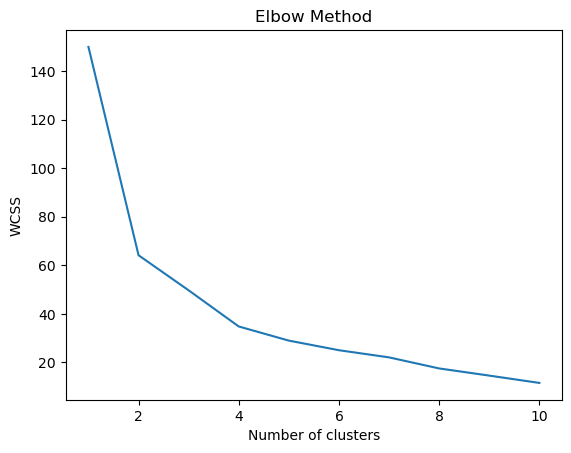

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_Univ_df)

C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [7]:
clusters_new.labels_

array([2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 1, 2,
       2, 1, 2], dtype=int32)

In [8]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [12]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ],
       [-1.35856999, -1.56922385,  1.49000956,  0.67249284, -0.92455897,
        -1.27552555],
       [ 0.4019729 ,  0.47834204, -0.4942352 , -0.19543032,  0.06879803,
         0.5419194 ],
       [-1.8031381 , -1.44318177,  1.43827311,  3.08142243, -1.32197103,
        -2.22202861]])

In [13]:
Univ.iloc[:,1:].groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
1,1,1122.200000,46.600000,68.000000,15.400000,14320.800000,75.400000
2,2,1309.117647,85.588235,29.647059,11.941176,28360.352941,91.529412
3,3,1075.000000,49.000000,67.000000,25.000000,8704.000000,67.000000


In [14]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,0
